In [2]:
import sys
sys.path.append('/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/')

from src.Equili import *

# LOCATION OF PROBLEM FOLDER
folder_loc = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/MESHES/TS-UNSTRUCTURED'
#mesh = '_ULTRACOARSE'
#mesh = '_COARSE'
#mesh = '_COARSE-FINE'
mesh = '_FINE'
#mesh = '_ULTRAFINE'

# MESH INFORMATION:
ElementType = 1     # Element type -> 1: TRIANGLE  ; 2: QUADRILATERAL
ElementOrder = 1    # Element order -> 1: LINEAR  ; 2: QUADRATIC ; 3: CUBIC ...

# VACUUM VESSEL GEOMETRY (ITER):
epsilon = 0.32            # inverse aspect ratio
kappa = 1.7               # elongation
delta = 0.33              # triangularity
Rmax = 8                  # plasma major radius
Rmin = 4                  # plasma minor radius

# SOLUTION CASE
CASE = 'NONLINEAR'

##############################################################

# DECLARE OBJECT PROBLEM (folder with ALYA files)
directory = folder_loc + mesh
Problem = Equili(directory,ElementType,ElementOrder,CASE)
Problem.epsilon = epsilon
Problem.kappa = kappa
Problem.delta = delta
Problem.Rmax = Rmax
Problem.Rmin = Rmin
Problem.R0 = (Rmax+Rmin)/2

Problem.ReadMesh()

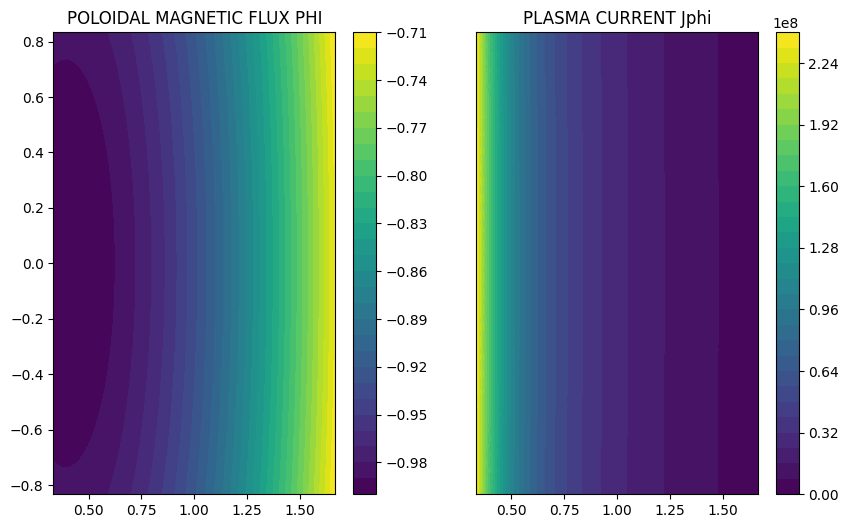

In [3]:
def PlotFields(X,PHI,Jphi):
    if len(np.shape(PHI)) == 2:
        PHI = PHI[:,0]
    if len(np.shape(Jphi)) == 2:
        Jphi = Jphi[:,0]
        
    fig, axs = plt.subplots(1, 2, figsize=(10,6))
    for i in range(2):
        axs[i].set_ylim(np.min(X[:,1]),np.max(X[:,1]))
        axs[i].set_xlim(np.min(X[:,0]),np.max(X[:,0]))
        
    # LEFT PLOT: PHI
    a1 = axs[0].tricontourf(X[:,0],X[:,1], PHI, levels=30)
    axs[0].set_title('POLOIDAL MAGNETIC FLUX PHI')
    plt.colorbar(a1, ax=axs[0])
    
    # RIGHT PLOT: Jphi
    a2 = axs[1].tricontourf(X[:,0],X[:,1], Jphi, levels=30)
    axs[1].set_title('PLASMA CURRENT Jphi')
    axs[1].yaxis.set_visible(False)
    plt.colorbar(a2, ax=axs[1])
    
    plt.show()
    
PHIexact = np.zeros([Problem.Nn])
Jphi = np.zeros([Problem.Nn])

X = Problem.X/Problem.R0

for i in range(Problem.Nn):
    PHIexact[i] = Problem.AnalyticalSolution(X[i,:])
    Jphi[i] = Problem.Jphi(X[i,0],X[i,1],PHIexact[i])
    
PlotFields(X,PHIexact,Jphi)